<a href="https://colab.research.google.com/github/vinodkumarreddy/Pytorch-learning/blob/main/squad_qna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Getting the data -
 - Trying to download the data using wget tools.
 - Try the general commandas first and then may be look at how to do the same using python


In [ ]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=44a5b5f93aa750f0dcf6efd8dbff58c894c514420fccc3cd73227acb7f24a138
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [ ]:
import wget
import os
import zipfile

In [ ]:
os.makedirs??

In [ ]:
# Creating the data directory
os.makedirs("Data", exist_ok = True)

In [ ]:
train_url = "https://rajpurkar.github.io/SQuAD-explorer/dataset/train-v2.0.json"
dev_url = "https://rajpurkar.github.io/SQuAD-explorer/dataset/dev-v2.0.json"

In [ ]:
train_f_path = wget.download(url = train_url, out = "./Data")
dev_f_path = wget.download(url = dev_url, out = "./Data")

In [ ]:
os.listdir("./Data")

['train-v2.0.json', 'dev-v2.0.json']

In [ ]:
train_f_path, dev_f_path

('./Data/train-v2.0.json', './Data/dev-v2.0.json')

#### Reading the json files

In [ ]:
with open(train_f_path, mode = 'r') as f:
  raw_train_data = f.read()

with open(dev_f_path, mode = "r") as f:
  raw_dev_data = f.read()

In [ ]:
len(raw_train_data)

42123633

In [ ]:
import json

In [ ]:
train_data = json.loads(raw_train_data)
dev_data = json.loads(raw_dev_data)

In [ ]:
len(train_data['data']), len(dev_data["data"])

(442, 35)

In [ ]:
def return_zero():
  return 0

In [ ]:
import pandas as pd

In [ ]:
def get_row_dict(title, context, id, question, answers, is_impossible):
  row_d = dict()
  row_d["title"] = title
  row_d["context"] = context
  row_d["id"] = id
  row_d["question"] = question
  if not is_impossible:
    row_d["answer"] = answers[0]["text"]
    row_d["answer_start"] = answers[0]["answer_start"]
  else:
    row_d["answer"] = None
    row_d["answer_start"] = None
  row_d["is_impossible"] = is_impossible
  return row_d

In [ ]:
def get_df_from_json(json_data):
  row_list = []
  for article in json_data["data"]:
    title = article["title"]
    for paragraph in article["paragraphs"]:
      context = paragraph["context"]
      for qa in paragraph["qas"]:
        question = qa["question"]
        id = qa["id"]
        answers = qa["answers"]
        is_impossible = qa["is_impossible"]
        row_d = get_row_dict(
            title, context, id, question, answers, is_impossible
        )
        row_list.append(row_d)
  data_df = pd.DataFrame(row_list)
  return data_df

In [ ]:
train_df = get_df_from_json(train_data)
dev_df = get_df_from_json(dev_data)

In [ ]:
train_df.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130319 entries, 0 to 130318
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   title          130319 non-null  object 
 1   context        130319 non-null  object 
 2   id             130319 non-null  object 
 3   question       130319 non-null  object 
 4   answer         86821 non-null   object 
 5   answer_start   86821 non-null   float64
 6   is_impossible  130319 non-null  bool   
dtypes: bool(1), float64(1), object(5)
memory usage: 6.1+ MB


In [ ]:
train_df["answer_length"] = train_df["answer"].str.len()

<Axes: >

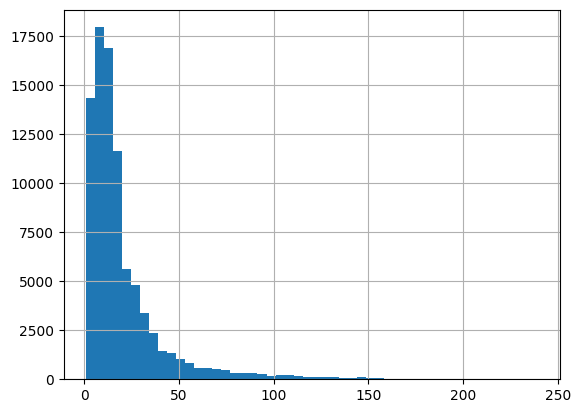

In [ ]:
train_df["answer_length"].hist(bins = 50)

In [ ]:
train_df

,title,context,id,question,answer,answer_start,is_impossible,answer_length
0,Beyoncé,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,56be85543aeaaa14008c9063,When did Beyonce start becoming popular?,in the late 1990s,269.0,False,17.0
1,Beyoncé,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,56be85543aeaaa14008c9065,What areas did Beyonce compete in when she was...,singing and dancing,207.0,False,19.0
2,Beyoncé,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,56be85543aeaaa14008c9066,When did Beyonce leave Destiny's Child and bec...,2003,526.0,False,4.0
3,Beyoncé,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,56bf6b0f3aeaaa14008c9601,In what city and state did Beyonce grow up?,"Houston, Texas",166.0,False,14.0
4,Beyoncé,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,56bf6b0f3aeaaa14008c9602,In which decade did Beyonce become famous?,late 1990s,276.0,False,10.0
...,...,...,...,...,...,...,...,...
130314,Matter,"The term ""matter"" is used throughout physics i...",5a7e070b70df9f001a875439,Physics has broadly agreed on the definition o...,None,NaN,True,NaN
130315,Matter,"The term ""matter"" is used throughout physics i...",5a7e070b70df9f001a87543a,Who coined the term partonic matter?,None,NaN,True,NaN
130316,Matter,"The term ""matter"" is used throughout physics i...",5a7e070b70df9f001a87543b,What is another name for anti-matter?,None,NaN,True,NaN
130317,Matter,"The term ""matter"" is used throughout physics i...",5a7e070b70df9f001a87543c,Matter usually does not need to be used in con...,None,NaN,True,NaN


#### Exploration Questions:
- Measure the distribution of is_impossible tokens across different topics
- Start with a small unupervised model which just finds the semantic similarity of the question and the context. Using the train data set the threshold and then measure the performance on the dev dataset.
- Textual analysis of the context and question columns:
  - Characters present in the corpus.
  - Word frequencies present in the corpus.
  - If there are any special symbols what is their nature? Are there any html tags etc that needs to be cleaned.
  - Probably just read through some of the context and question examples may be through random sampling and see any eccentricities and quirks of the data.
  - Token length distribution of various contexts and questions could also be important

In [ ]:
def get_neg_sum(df):
  return len(df) - sum(df)

In [ ]:
pd.DataFrame(train_df.groupby("title").agg(
    {
        "is_impossible" : [sum, get_neg_sum],
    }
)).reset_index()

title is_impossible            
                                                sum get_neg_sum
0             2008_Sichuan_earthquake             0         521
1    2008_Summer_Olympics_torch_relay             0         500
2                          51st_state           159         134
3                               ASCII           127         110
4                          A_cappella           174         104
..                                ...           ...         ...
437                          Xbox_360           129         127
438                   Yale_University           230         222
439                           YouTube           162         162
440                          Zhejiang           178         189
441                              Zinc           159         185

[442 rows x 3 columns]

#### Semantic Similarity model for is_impossible prediction

- Start with tokenizers that come with the sentence transformers models.
- Furthur we can learn on how to do sub word tokenization.
- Learn on how to generate embeddings much faster than how it usually is.
- write code to get embeddings from text using the pre trained models.

In [ ]:
!pip install sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 12.1 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=30fd1ddd4c73d226206fb4befc2469ff2bc4f72c8566628620e6326605d16237
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [ ]:
from sentence_transformers import SentenceTransformer

In [ ]:
model = SentenceTransformer("multi-qa-MiniLM-L6-cos-v1")

.gitattributes:   0%|          | 0.00/737 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/11.5k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

data_config.json:   0%|          | 0.00/25.5k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/383 [00:00<?, ?B/s]

train_script.py:   0%|          | 0.00/13.8k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

#### Method 1 - Using pretrained embeddings and fine tune the threshold using train data

##### Split the question and context list

- Initially we will try with just random aplitting.
- We might need to decide on how to split the data so that the performance on the test data is representative of real world performance.
- May be split the data so that the same topic is not present in train and test.
- Or split it so that the same context doesn't appear both in train and test.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
data = train_df

In [ ]:
train_df, valid_df = train_test_split(data, test_size = 0.3, stratify = data.is_impossible)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91223 entries, 55384 to 3126
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          91223 non-null  object 
 1   context        91223 non-null  object 
 2   id             91223 non-null  object 
 3   question       91223 non-null  object 
 4   answer         60775 non-null  object 
 5   answer_start   60775 non-null  float64
 6   is_impossible  91223 non-null  bool   
 7   answer_length  60775 non-null  float64
dtypes: bool(1), float64(2), object(5)
memory usage: 5.7+ MB


##### Finding the threshold using training data pretrained embeddings

In [ ]:
model.encode??

In [ ]:
question_list = list(train_df["question"])

In [ ]:
%%time
question_embeddings = model.encode(
    question_list,
    batch_size = 256,
    show_progress_bar = True,
    normalize_embeddings = True
    )

Batches:   0%|          | 0/357 [00:00<?, ?it/s]

CPU times: user 24.7 s, sys: 1.42 s, total: 26.1 s
Wall time: 30.3 s


In [ ]:
question_embeddings.shape

(91223, 384)

In [ ]:
context_list = list(train_df["context"])

In [ ]:
%%time
context_embeddings = model.encode(
    context_list,
    batch_size = 256,
    show_progress_bar = True,
    normalize_embeddings = True
    )

Batches:   0%|          | 0/357 [00:00<?, ?it/s]

CPU times: user 4min 40s, sys: 732 ms, total: 4min 41s
Wall time: 4min 18s


In [ ]:
context_embeddings.shape

(91223, 384)

In [ ]:
question_embeddings_t = torch.from_numpy(question_embeddings)
context_embeddings_t = torch.from_numpy(context_embeddings)

##### Method 1

In [ ]:
import torch

In [ ]:
cosine_similarities = torch.dot(question_embeddings_t, context_embeddings_t)

In [ ]:
cosine_similarities.shape

##### Method 2

In [ ]:
batch_size = question_embeddings.shape[0]
embedding_dim = question_embeddings.shape[1]

In [ ]:
question_embeddings_t.reshape(batch_size, embedding_dim, 1).shape, context_embeddings_t.reshape(batch_size, 1, embedding_dim).shape

((130319, 384, 1), (130319, 1, 384))

In [ ]:
question_embeddings_t = question_embeddings_t.reshape(batch_size, embedding_dim, 1)
context_embeddings_t = context_embeddings_t.reshape(batch_size, 1, embedding_dim)

In [ ]:
cosine_similarities = question_embeddings_t @ context_embeddings_t

##### Method 3 - Batching the job into multiple matrix multiplications

In [ ]:
data_len = question_embeddings_t.shape[0]

In [ ]:
batch_size = 10000

In [ ]:
import numpy as np

In [ ]:
start = 0
end = batch_size
res_list = []
while start < data_len:
  cosine_similarities_batch = torch.sum(question_embeddings_t[start:end]*(context_embeddings_t[start:end]), dim = 1)
  res_list.append(cosine_similarities_batch)
  start = end
  end = start + batch_size

cosine_similarities = torch.cat(res_list)

In [ ]:
cosine_similarities

tensor([0.7160, 0.5237, 0.5340,  ..., 0.5515, 0.5435, 0.4688])

In [ ]:
cosine_similarities.shape

torch.Size([91223])

In [ ]:
question_embeddings_t.shape

NameError: ignored

In [ ]:
torch.dot(question_embeddings_t[0], context_embeddings_t[0])

tensor(0.7160)

##### Method 4 - Using sentence Transformers utils.dot_product method

In [ ]:
from sentence_transformers.util import dot_score

In [ ]:
cosine_similarities = dot_score(question_embeddings_t, context_embeddings_t)

NameError: ignored

In [ ]:
actual = torch.tensor(train_df["is_impossible"])

In [ ]:
def get_accuracy(actual, predicted):
  correct_predictions = actual == precdicted
  return sum(correct_predictions)/len(correct_predictions)

def get_predictions(similarities, threshold):
  predictions = torch.ones_liske(similarities)
  class_1_filt = similarities > threshold
  predictions[class_1_filt] = 0
  return predictions

In [ ]:
threshold_accuracies = dict()
for threshold in (0.5, 0.6, 0.7, 0.8, 0.9):
  predicted = get_predictions(cosine_similarities, threshold)
  threshold_accuracies[threshold] = get_accuracy(actual, predicted)

In [ ]:
threshold_accuracies

Testing the Method on the valid data set.

In [ ]:
valid_df
valid_question_list = valid_df
valid_context_list =
valid_question_embeddings
valid_context_embeddings
